In [25]:
import pandas as pd
import numpy as np

In [26]:
predictions_df = pd.read_csv('../predictions.csv')

In [27]:
from sklearn.preprocessing import MinMaxScaler

predictions_df['Normalized Observed'] = MinMaxScaler().fit_transform(predictions_df[['Observed log(TX/Txref)']])

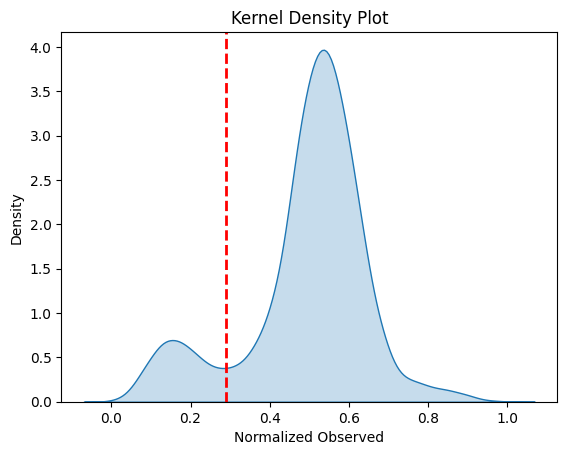

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictions_df is already defined and contains the relevant data
sns.kdeplot(predictions_df['Normalized Observed'], fill=True)
plt.title('Kernel Density Plot')
plt.xlabel('Normalized Observed')
plt.ylabel('Density')

# Draw a vertical line at x=0.29
plt.axvline(x=0.29, color='r', linestyle='--', linewidth=2)

plt.show()


In [29]:
predictions_df['Peak'] = predictions_df['Normalized Observed'].apply(lambda x: 1 if x > 0.29 else 0)

In [30]:
predictions_df.head()

,UP,h35,spacs,h10,disc,ITR,Observed log(TX/Txref),Predicted log(TX/Txref),Our Prediction,Normalized Observed,Peak
0,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGG,CTCTACCTTAGTTTGTACGTT,-3.386326,-3.844827,-4.049288,0.294388,1
1,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGG,CTCTACCTTAGTTTGTACGTT,-3.503140,-3.905283,-4.041058,0.270048,0
2,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCG,CTCTACCTTAGTTTGTACGTT,-4.207206,-3.905283,-4.135313,0.123341,0
3,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGC,CTCTACCTTAGTTTGTACGTT,-3.392439,-3.877808,-4.030675,0.293115,1
4,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGC,CTCTACCTTAGTTTGTACGTT,-3.698903,-3.672384,-3.941935,0.229256,0


In [32]:
y = predictions_df['Peak']

In [46]:
def one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
    return np.concatenate([mapping[base] for base in sequence])

X = pd.DataFrame(columns=['h10_h35'])
X['h10_h35'] = predictions_df['h35'] + predictions_df['h10']
X = X['h10_h35'].apply(one_hot_encode)
X = pd.DataFrame(X.tolist())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9685275384038966

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       347
           1       0.98      0.98      0.98      2322

    accuracy                           0.97      2669
   macro avg       0.93      0.93      0.93      2669
weighted avg       0.97      0.97      0.97      2669



In [85]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [86]:
is_first_peak = [0 for _ in range(len(X.columns))]
is_second_peak = [0 for _ in range(len(X.columns))]
for index, row in X.iterrows():
    if y[index] == 1:
        is_second_peak += row
    else:
        is_first_peak += row

likelihoods = is_second_peak / (is_first_peak + is_second_peak)

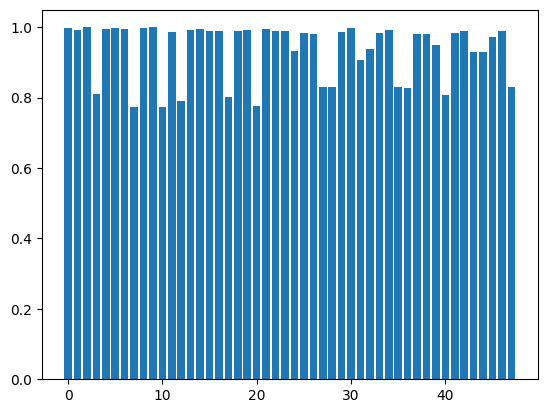

In [87]:
x_positions = np.arange(len(likelihoods))
plt.bar(x_positions, likelihoods)
plt.show()

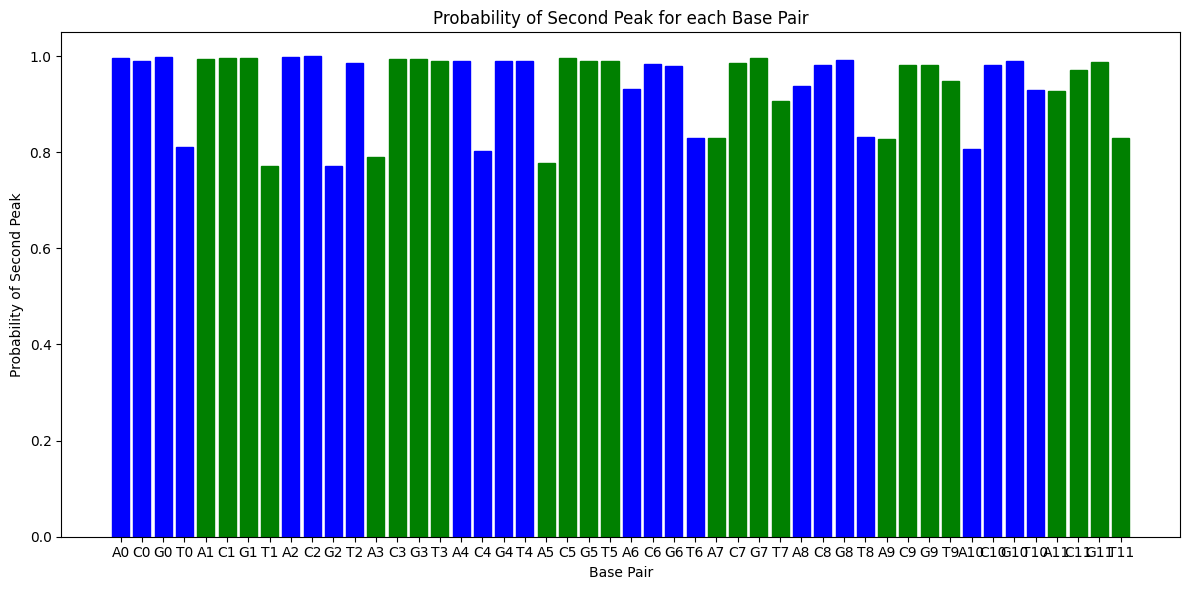

In [99]:
import matplotlib.pyplot as plt
import numpy as np
categories = []
for i in range(12):
    categories += ['A'+str(i), 'C'+str(i), 'G'+str(i), 'T'+str(i)]

num_groups = len(categories) // 4

colors = ['blue', 'green']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figsize as needed
bars = ax.bar(categories, likelihoods)

# Apply colors to bars
for i in range(num_groups):
    start_index = i * 4
    end_index = start_index + 4
    color = colors[i % len(colors)]
    for j in range(start_index, end_index):
        bars[j].set_color(color)

plt.xlabel('Base Pair')
plt.ylabel('Probability of Second Peak')
plt.title('Probability of Second Peak for each Base Pair')
plt.xticks()
plt.tight_layout()
plt.show()


In [96]:
print(likelihoods)

0     0.996853
1     0.990468
2     0.998908
3     0.810768
4     0.993934
5     0.996698
6     0.995261
7     0.771903
8     0.998599
9     0.999387
10    0.771915
11    0.984681
12    0.789521
13    0.993049
14    0.993427
15    0.989869
16    0.989086
17    0.802192
18    0.989767
19    0.990622
20    0.776556
21    0.995612
22    0.988796
23    0.989315
24    0.932493
25    0.984067
26    0.979846
27    0.830047
28    0.829925
29    0.985240
30    0.996055
31    0.906443
32    0.938306
33    0.981917
34    0.992000
35    0.830611
36    0.826411
37    0.980825
38    0.981497
39    0.948387
40    0.806533
41    0.982347
42    0.988930
43    0.928571
44    0.928277
45    0.971223
46    0.988304
47    0.828871
dtype: float64
